In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
!pip install kneed

In [17]:
#import dataset
link = "https://raw.githubusercontent.com/vanyavidyavimala/exerciseweek8/main/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah.csv"
dt = pd.read_csv(link, sep=',')
dt = dt.iloc[1:,:]
dt

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.00,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.00,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.00,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.00,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.00,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [18]:
# describe data
dt.describe()

,Luas Tanah (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,306.000000,306.000000
mean,226.908795,4.276873,3.339869,1.856209
std,202.149571,1.646412,1.632311,0.512702
min,14.000000,1.000000,1.000000,1.000000
25%,96.000000,3.000000,2.000000,2.000000
50%,162.000000,4.000000,3.000000,2.000000
75%,286.000000,5.000000,4.000000,2.000000
max,1561.000000,13.000000,13.000000,4.000000


In [19]:
#missingvalue
dt.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [22]:
#menginput missing value
dt.dropna(subset=["Jumlah Kamar Mandi"],inplace=True)
dt.dropna(subset=["Tingkat/Lantai "],inplace=True)
dt["Arah Hadap Rumah"] = dt['Arah Hadap Rumah'].fillna("Utara")
dt["Posisi Rumah"] = dt['Posisi Rumah'].fillna("Standard")
dt["Lebar Jalan Depan Rumah (ROW)"] = dt['Lebar Jalan Depan Rumah (ROW)'].fillna("1-2 Mobil")
dt

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.00,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.00,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.00,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.00,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.00,5.0,6.0,2.0,10800000000,Belum,Utara,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34,2.0,1.0,1.0,450000000,Belum,Utara,Standard,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212,4.0,4.0,1.0,5250000000,Belum,Selatan,Standard,1-2 Mobil
305,Premium,Mulyorejo,102.0,156,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170,4.0,3.0,2.0,1550000000,Belum,Utara,Standard,> 2 Mobil


In [23]:
dt.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [24]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

dt['Area Category'] = lb.fit_transform(dt['Area Category'])
dt['Nama Daerah'] = lb.fit_transform(dt['Nama Daerah'])
dt['Luas Tanah (m2)'] = lb.fit_transform(dt['Luas Tanah (m2)'])
dt['Luas Bangunan (m2)'] = lb.fit_transform(dt['Luas Bangunan (m2)'])
dt['Jumlah Kamar'] = lb.fit_transform(dt['Jumlah Kamar'])
dt['Jumlah Kamar Mandi'] = lb.fit_transform(dt['Jumlah Kamar Mandi'])
dt["Tingkat/Lantai "] = lb.fit_transform(dt["Tingkat/Lantai "])
dt['Harga Penawaran (dari Owner)'] = lb.fit_transform(dt['Harga Penawaran (dari Owner)'])
dt['Terjual/Belum'] = lb.fit_transform(dt['Terjual/Belum'])
dt['Arah Hadap Rumah'] = lb.fit_transform(dt['Arah Hadap Rumah'])
dt['Posisi Rumah'] = lb.fit_transform(dt['Posisi Rumah'])
dt['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(dt['Lebar Jalan Depan Rumah (ROW)'])
#Area Category 0 = Below Standard, 1 = Premium, 2 = Sangat Premium, 3 = Standard
#Terjual/Belum 0 = Belum, 1 = Sudah
#Posisi Rumah 0 = Ujung Gang Buntu, 1 = Ngantong, 2 = Standard, 3 = Tikungan, 4 = Tusuk Belakang, 5 = Tusuk Sate

In [25]:
#scaling
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
d_scale = sd_scaler.fit_transform(dt.to_numpy())
d_scale = pd.DataFrame(d_scale, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
d_scale.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.681800,1.045847,-1.685670,1.143701,-1.416808,-1.487025,0.288036,-0.060174,0.0,0.846555,-0.189024,0.212389
1,1.008492,-0.356217,0.085281,-0.754527,0.453869,0.426657,0.288036,-0.167127,0.0,-1.131984,-5.430146,-0.832426
2,0.111728,-0.356217,0.195966,-0.215524,0.453869,1.064551,0.288036,0.046779,0.0,0.846555,-0.189024,-0.832426
3,-0.785036,-0.356217,1.026100,1.190570,0.453869,1.064551,0.288036,0.902400,0.0,-2.121253,-0.189024,-0.832426
4,-0.785036,-0.356217,1.358153,1.003091,0.453869,1.702445,0.288036,-1.643074,0.0,0.846555,-0.189024,-0.832426


In [33]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
X=dt


In [34]:
sc = StandardScaler()
standard = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
scaled_features = sc.fit(dt)

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=4,max_iter=300,random_state=42)

model = kmeans.fit_predict(d_scale)
model

array([3, 2, 0, 0, 0, 3, 1, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 2, 2, 3, 3, 2, 1, 3,
       2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1,
       3, 2, 2, 2, 0, 2, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 1, 0, 0, 0, 3, 0, 2, 3, 2, 3, 2, 3, 3, 3, 0, 1, 3, 0, 0, 1, 0,
       1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 3, 0, 1, 2, 1, 1, 0, 3, 1, 1, 2, 1,
       2, 3, 3, 1, 3, 2, 0, 0, 3, 2, 1, 2, 3, 2, 2, 0, 0, 2, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 0, 3, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 1, 3, 0, 0, 1, 1, 1, 2, 2, 1, 3, 0, 0, 0, 2, 2, 3, 2, 1, 1, 3,
       1, 0, 0, 0, 1, 3, 0, 1, 2, 3, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 2, 1, 2, 3, 0, 0, 2, 0, 3, 1, 2, 3,

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


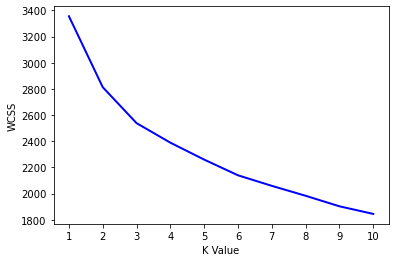

In [37]:
# manually visualize the elbow method using plotlib
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
X2=d_scale
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [38]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11), wcss, curve="convex",direction="decreasing")
print("The best K Value for you model is", findknee.elbow)

The best K Value for you model is 3


In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=4,max_iter=300,random_state=42)

model = kmeans.fit_predict(d_scale)
model
dt['K-MEANS'] = model
dt

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster,K-MEANS
1,0,99,5,118,1,0,2,80,0,3,2,1,1,3
2,3,48,69,37,4,3,2,75,0,1,0,0,2,2
3,2,48,73,60,4,4,2,85,0,3,2,0,2,0
4,1,48,103,120,4,4,2,125,0,0,2,0,0,0
5,1,48,115,112,4,5,2,6,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,10,80,1,0,0,115,0,3,2,2,1,3
304,2,104,95,46,3,3,0,126,0,1,2,0,2,2
305,1,72,40,28,3,1,2,51,0,1,2,0,2,1
306,3,104,38,36,3,2,2,31,0,3,2,2,2,2


In [55]:
#Kesimpulan KMEANS
dt.groupby('K-MEANS').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
K-MEANS,,,,,,,,,,,,,
0,1,11,103.780000,91.870000,4.760000,3.750000,2.020000,96.400000,0,3,2,0.980000,100
1,1,72,55.173333,37.146667,2.880000,1.933333,1.786667,71.040000,0,3,2,0.733333,75
2,3,"[30, 72, 121]",56.746835,36.632911,3.000000,2.063291,1.658228,69.379747,0,3,2,0.746835,79
3,3,11,21.686275,122.313725,1.352941,0.549020,1.058824,94.294118,0,3,2,0.607843,51


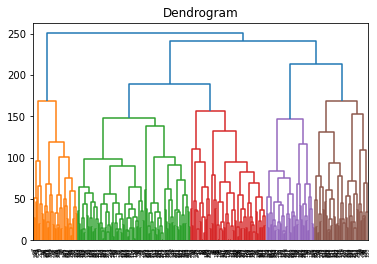

In [40]:
#Hierarchical Clustering complete
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.show()


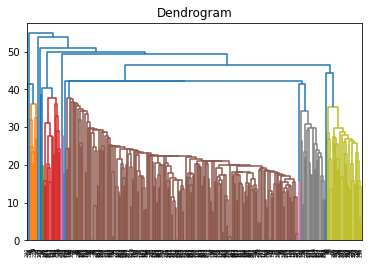

In [41]:
#Hierarchical Clustering single
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.show()


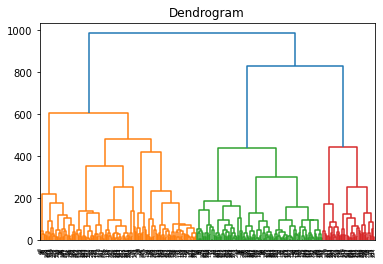

In [42]:
#Hierarchical Clustering ward
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()


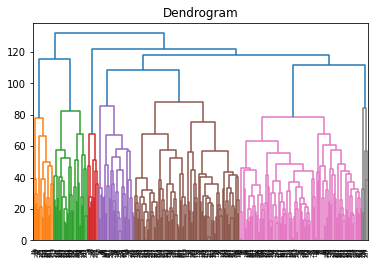

In [43]:
#Hierarchical Clustering Average
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.show()


In [48]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
h = hc_model.fit_predict(d_scale)

In [52]:
dtc = dt.copy()
dtc['Hierarchical'] = h
dtc

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster,K-MEANS,Hierarchical
1,0,99,5,118,1,0,2,80,0,3,2,1,1,3,2
2,3,48,69,37,4,3,2,75,0,1,0,0,2,2,1
3,2,48,73,60,4,4,2,85,0,3,2,0,2,0,1
4,1,48,103,120,4,4,2,125,0,0,2,0,0,0,1
5,1,48,115,112,4,5,2,6,0,3,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,10,80,1,0,0,115,0,3,2,2,1,3,2
304,2,104,95,46,3,3,0,126,0,1,2,0,2,2,0
305,1,72,40,28,3,1,2,51,0,1,2,0,2,1,1
306,3,104,38,36,3,2,2,31,0,3,2,2,2,2,0


In [53]:
#Kesimpulan Hierarchical
dtc.groupby('Hierarchical').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
Hierarchical,,,,,,,,,,,,,
0,3,30,59.216981,41.367925,3.169811,2.094340,1.641509,72.679245,0,3,2,0.773585,106
1,1,11,88.206107,74.435115,4.236641,3.396947,2.137405,90.526718,0,3,2,0.900763,131
2,3,11,33.426471,102.485294,1.573529,0.647059,0.985294,83.750000,0,3,2,0.632353,68
